In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Linear regression class with multiple optimization methods

In [2]:
class LinearRegressionClass:
    def __init__(self):
        pass
        
    # Class Methods
    def fit(self, X, y, optimizer, α=0.1, max_iter=10**3):
        # Dimensions of the dataset
        m, n = X.shape
        
        # Shuffle the rows of the training data
        data = np.hstack((X,y.reshape((-1,1))))
        np.random.shuffle(data)

        X = data[:,0].reshape((-1,1))
        y = data[:,1]
        
        # Gradient descent
        # Initialize the parameters
        w = np.random.rand(n)
        b = 0
        
        self.cost_ls = []
        
        if optimizer=="Batch Gradient descent":
            for iteration in range(max_iter):
                # Update rule for the model parameters
                w = w - (α / m) * np.dot(X.T.flatten(), (self.__h(X, w, b) - y.reshape((-1,1))).flatten())
                b = b - (α / m) * np.sum(self.__h(X, w, b) - y.reshape((-1,1)))
                
                # Record the value of the cost per iteration
                self.cost_ls.append(self.__cost(X, y, w, b, m))
                
        elif optimizer=="SGD":
            for iteration in range(max_iter):
                for i in range(m):
                    # Update rule for the model parameters
                    w = w - α * (self.__h(X[i], w, b) - y[i]) * X[i]
                    b = b - α * (self.__h(X[i], w, b) - y[i])
                
                # Record the value of the cost per iteration
                self.cost_ls.append(self.__cost(X, y, w, b, m))

                    
        elif len(optimizer)==2: # Mini-batch gradient descent
            batch_size = optimizer[1] # batch size
            for iteration in range(max_iter):
                for i in range(0, m, batch_size):
                    # Gets the ith batch from X_train and y_train
                    X_batch_i = data[i:i+batch_size,0].reshape((-1, 1))
                    y_batch_i = data[i:i+batch_size,1].reshape((-1,1))

                    # Update rule for the model parameters
                    w = w - (α / batch_size) * np.dot(X_batch_i.T.flatten(), (self.__h(X_batch_i,w,b) - y_batch_i.reshape((-1,1))).flatten())
                    b = b - (α / batch_size) * np.sum(self.__h(X_batch_i, w, b) - y_batch_i.reshape((-1,1)))
                    
                # Record the value of the cost per iteration
                self.cost_ls.append(self.__cost(X, y, w, b, m))
                
            
        # best y-intercept and slope
        self.w = w
        self.b = b
        
        # Compute for the linear regression model's score
        predicted_y = np.array([self.predict(X_i) for X_i in X])
        SS_res = 0
        for i in range(m):
            SS_res += (y[i] - predicted_y[i])**2
            
        SS_tot = 0
        for i in range(m):
            SS_tot += (y[i] - y.mean())**2
        
        self.R2 = 1 - (SS_res[0]/SS_tot)
    
    
    def predict(self, x_new):      
        return self.__h(x_new, self.w, self.b)

    
    # Private Methods    
    def __h(self, x, w, b): # Linear regression model
        '''
        h is the hypothesis
        x = input
        w = y-intercept
        b = slope

        Returns:
            y - the predicted value
        '''
        return b + w*x
    
    def __cost(self, X, y, w, b, m): # cost function
        return (1 / (2*m)) * np.sum((self.__h(X, w, b) - y.reshape((-1,1)))**2)

# Make regression data

In [3]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=4)

# Batch Gradient descent

<IPython.core.display.Javascript object>


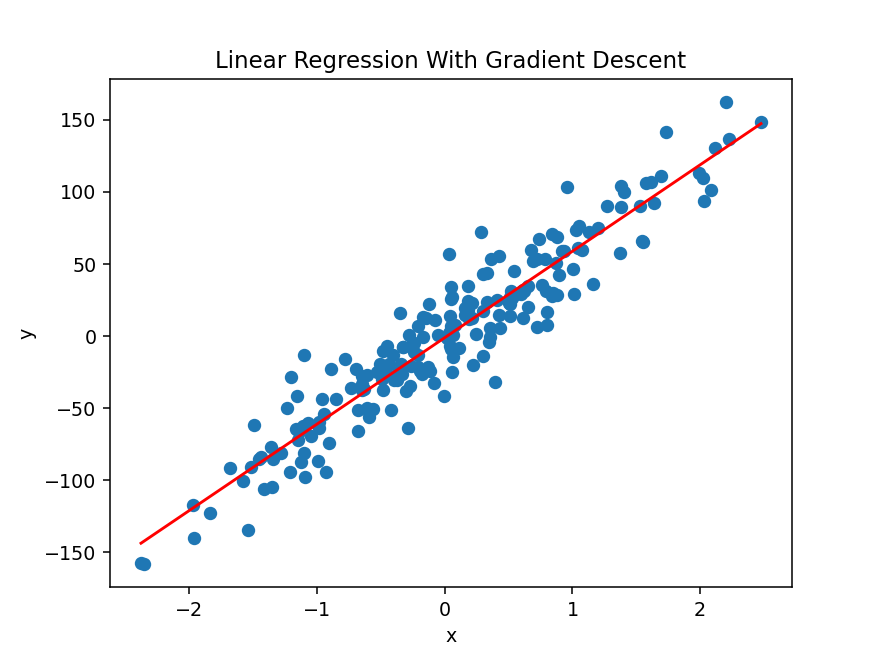

Text(0.5, 1.0, 'Linear Regression With Gradient Descent')

In [4]:
regtest_GD = LinearRegressionClass()
regtest_GD.fit(X, y, optimizer="Batch Gradient descent")

plt.figure()
plt.scatter(X,y)

xs_line = np.linspace(np.min(X), np.max(X))
plt.plot(xs_line, regtest_GD.b + regtest_GD.w*xs_line, 'red')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression With Gradient Descent")

# Stochastic gradient descent

<IPython.core.display.Javascript object>


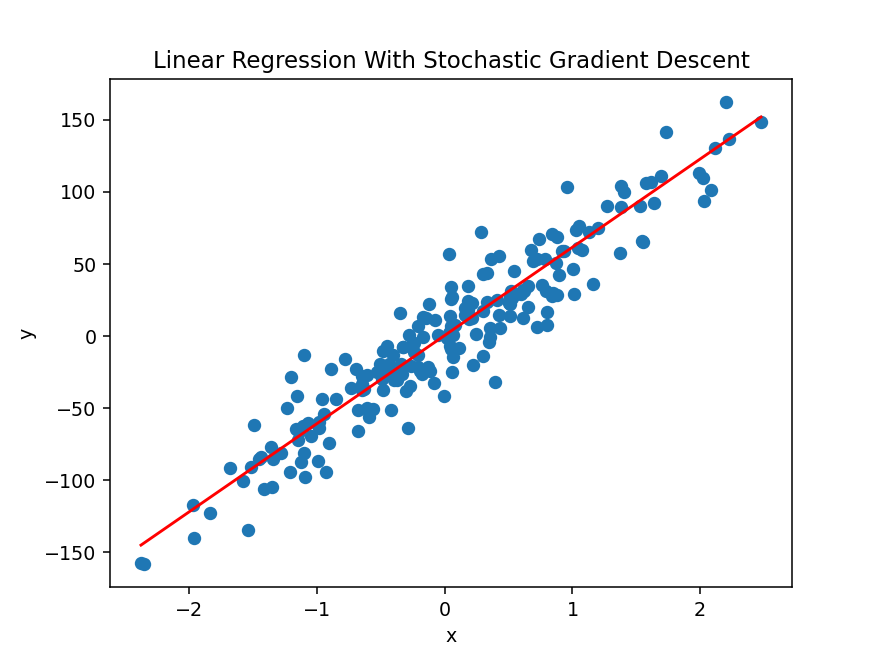

Text(0.5, 1.0, 'Linear Regression With Stochastic Gradient Descent')

In [5]:
regtest_SGD = LinearRegressionClass()
regtest_SGD.fit(X, y, optimizer="SGD")

plt.figure()
plt.scatter(X,y)

xs_line = np.linspace(np.min(X), np.max(X))
plt.plot(xs_line, regtest_SGD.b + regtest_SGD.w*xs_line, 'red')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression With Stochastic Gradient Descent")

# Mini-batch gradient descent

<IPython.core.display.Javascript object>


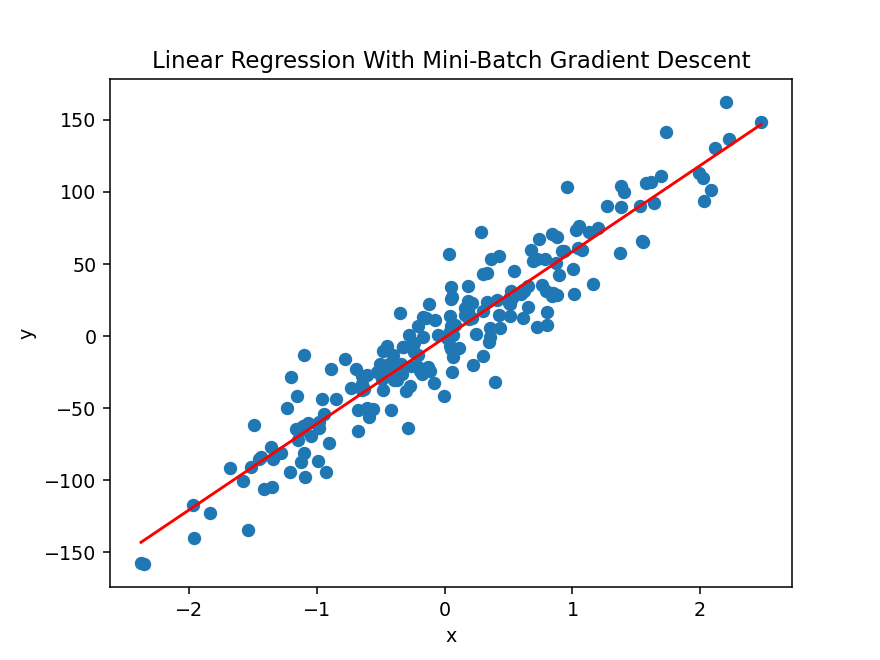

Text(0.5, 1.0, 'Linear Regression With Mini-Batch Gradient Descent')

In [6]:
regtest_MBGD = LinearRegressionClass()
regtest_MBGD.fit(X, y, optimizer=('MGD', 25))

plt.figure()
plt.scatter(X,y)

xs_line = np.linspace(np.min(X), np.max(X))
plt.plot(xs_line, regtest_MBGD.b + regtest_MBGD.w*xs_line, 'red')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression With Mini-Batch Gradient Descent")

# Comparison between the convergence of the 3 methods

<IPython.core.display.Javascript object>


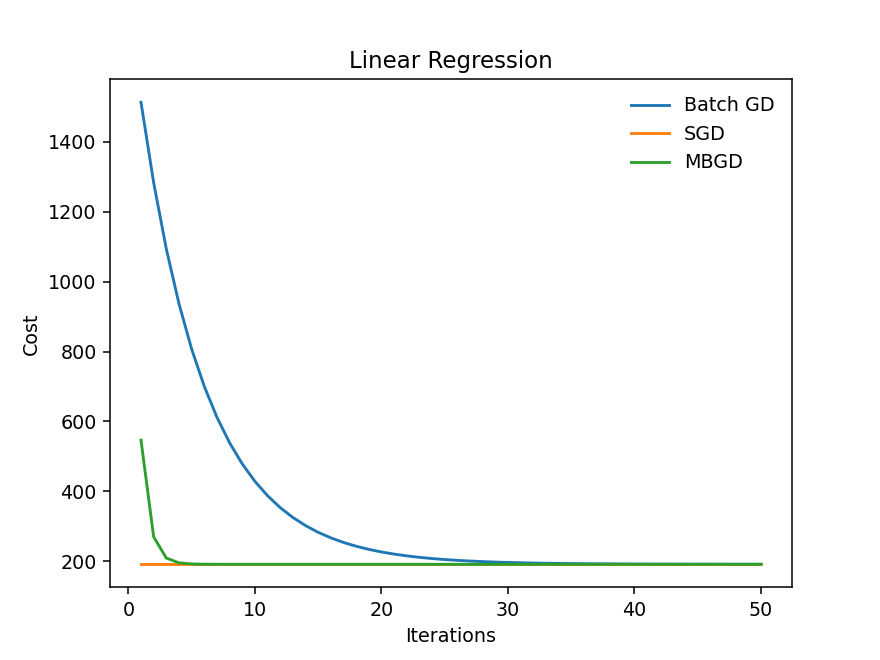

In [12]:
plt.figure()
plt.plot(np.arange(1, 10**4+1)[:50], regtest_GD.cost_ls[:50], label='Batch GD')
plt.plot(np.arange(1, 10**4+1)[:50], regtest_SGD.cost_ls[:50], label='SGD')
plt.plot(np.arange(1, 10**4+1)[:50], regtest_MBGD.cost_ls[:50], label='MBGD')
plt.legend(frameon=False)

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Linear Regression')

plt.savefig('Comparison.png', dpi=300)